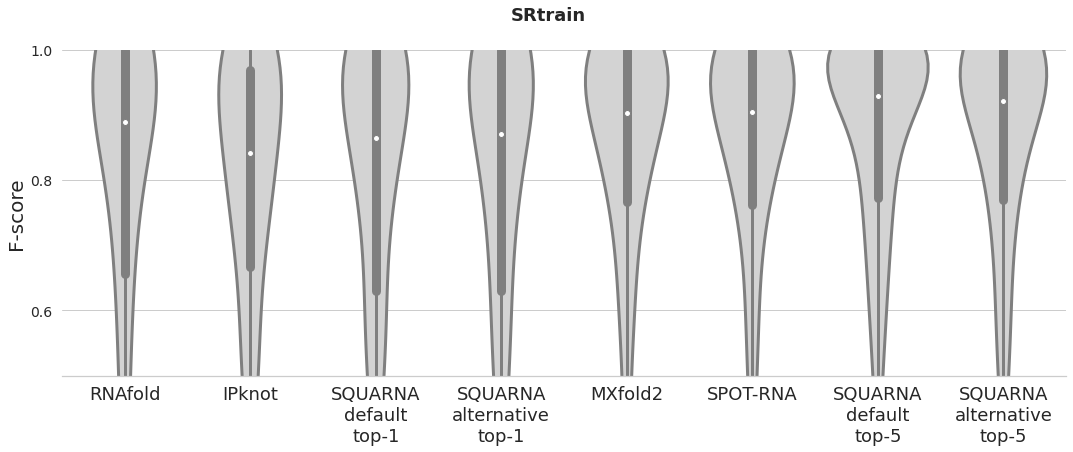

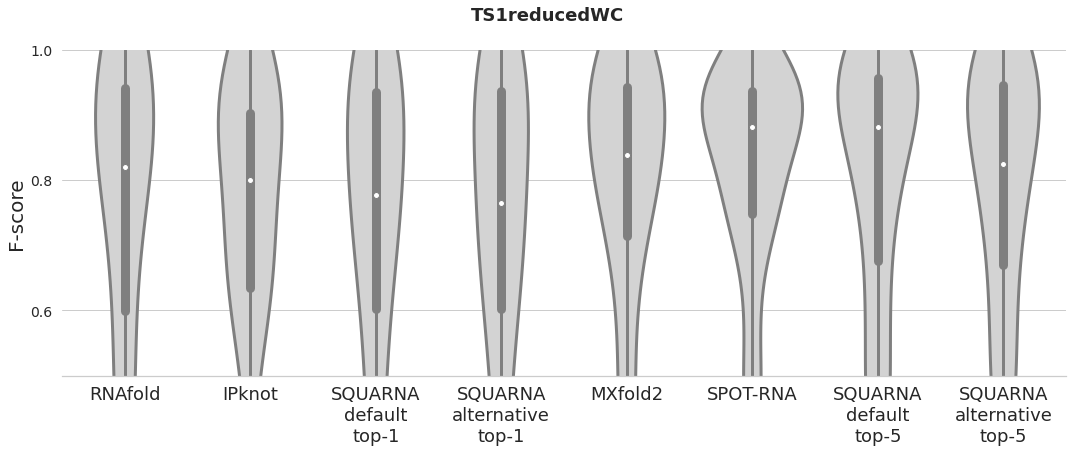

In [48]:
import matplotlib.pyplot as plt

for dataset in ("SRtrain","TS1reducedWC"):
    
    tools = "RNAfold IPknot SQUARNA SQUARNAalt MXfold2 SPOT-RNA SQUARNA5 SQUARNAalt5".split(' ')
    
    labels = ["RNAfold","IPknot", "SQUARNA\ndefault\ntop-1", 
              "SQUARNA\nalternative\ntop-1", 
              "MXfold2", "SPOT-RNA", 
              "SQUARNA\ndefault\ntop-5", 
              "SQUARNA\nalternative\ntop-5", ]
    
    res = {}
    
    for tool in tools:
        
        fscores = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            for line in lines[1:]:
                fscores.append(float(line.strip().split('\t')[fsind]))
            
        res[tool] = fscores

    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    sns.set(style="whitegrid")

    df = pd.DataFrame(res)

    f, ax = plt.subplots(figsize=(18, 6))
    
    ax.set_ylim([0.5,1.0])

    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)

    sns.despine(left=True)

    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.6,0.8,1.0],labels=[0.6,0.8,1.0], size=14)


In [15]:
pd.DataFrame(res)

,RNAfold,IPknot,MXfold2,SPOT-RNA,SQUARNA,SQUARNAalt,SQUARNA5,SQUARNAalt5
0,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,0.000,0.800,1.000,1.000,1.000,1.000,1.000,1.000
2,0.000,0.000,1.000,0.800,0.800,0.800,0.800,0.800
3,1.000,0.857,1.000,1.000,1.000,1.000,1.000,1.000
4,0.000,0.800,0.000,0.000,0.800,0.800,0.800,0.800
...,...,...,...,...,...,...,...,...
269,0.306,0.299,0.688,0.265,0.023,0.043,0.045,0.043
270,0.901,0.824,0.871,0.756,0.511,0.538,0.521,0.578
271,0.652,0.827,0.712,0.643,0.575,0.530,0.583,0.549
272,0.478,0.599,0.634,0.511,0.448,0.448,0.448,0.448
